## Funksjoner med andre funksjoner som parametre
Skal se på et litt større eksempel i samme stil som forrige
- representerer også et typisk problemløsningsmønster:
    - finne __lengste delsekvens__ innen en sekvens
    - som tilfredsstiller visse kriterier
    
Trenger da gjerne to (grupper av) variable underveis
- én for å samle opp informasjon om delsekvensen vi undersøker _akkurat nå_
- én for å huske informasjon om delsekvensen som foreløpig er den beste totalt sett

## Bygger på de to eksemplene fra forrige episode

### Eksempel 1:
- longest_both_below_zero(f, g, x_val)
    - finne lengste intervall innen x_val hvor både f(x) < 0 og g(x) < 0 samtidig


In [1]:
import numpy as np

def longest_both_below_zero(f, g, x_val):
    '''
    Receives two functions f, g and a numpy array x_val of float x-values
    Returns the longest interval within x_val where both f and g are negative
    at the same time, as a tuple (start, stop) where start is the smallest
    x-value of the longest interval and stop is the biggest x-value.
    If x_val is empty or there are no x-values within x_val for which both
    the functions are negative at the same time, an empty tuple is returned.
    '''
    res = ()         # denne skal huske beste intervall hittil, og bli returnert til slutt
    start = None     # denne skal huske startverdi for intervallet vi ser på nå
                     # og er None hvis vi ikke er i et aktuelt intervall for øyeblikket
    for i in range(len(x_val)):
        if f(x_val[i]) < 0 and g(x_val[i]) < 0:
            if start is None:
                start = x_val[i]        # ser på et aktuelt intervall, må huske startpunktet
        else: # betingelsen holder ikke, en eller begge funksjoner er positiv
            if start is not None:       # vi var i aktuelt intervall, men det har akkurat slutta
                # Er intervallet som nettopp  slutta, det beste hittil?
                if res == () or (x_val[i-1] - start > res[1] - res[0]):
                    # Merk at det er x_val[i-1] som er stoppverdi her,
                    # siden x_val[i] er verdien der vi fant at betingelsen IKKE lenger holdt
                    res = (start, x_val[i-1])
                    # Nå inneholder res beste intervall hittil
                # Vi har nå fullført et intervall, må nullstille start i påvente av neste aktuelle intervall
                start = None
    # I else-delen ovenfor har vi basert registrering av nytt beste intervall på å sjekke lengde av intervallet
    # når det er slutt, dvs. når vi kommer til et sted hvor funksjon ikke lenger er negativ.
    # Men det fins også et annet scenario: vi kan komme til slutten av x_val mens vi er i et aktuelt intervall:
    if start is not None and (res == () or (x_val[-1] - start > res[1] - res[0])):
        res = (start, x_val[-1])  
    return res


def f(x):
    return x**2 - 1

print(longest_both_below_zero(f, np.sin, np.linspace(-3, 3, 10000)))

(np.float64(-0.9993999399939995), np.float64(-0.0003000300030002734))


### Eksempel 2
- longest_likely_continuous(f, x_val, tolerance)
    - finne lengste intervall innen x_val hvor f(x) ser ut til å være kontinuerlig
    - igjen: merk at denne ikke gir noen garanti for at den faktisk _er_ kontinuerlig
        - hvis funksjonen er kontinuerlig med plutselige bratte endringer, kan vi feilaktig tro den er diskontinuerlig
        - hvis funksjonen har diskontinuiteter hvor endringen er liten, kan vi feilaktig tro den er kontinuerlig
    - risiko for feil konklusjon øker jo større toleranseverdi vi har

In [2]:
import numpy as np

def longest_likely_continuous(f, x_values, tolerance):
    result = ()
    current_start = None
    for i in range(1, len(x_values)):
        if abs(f(x_values[i]) - f(x_values[i-1])) < tolerance:
            if current_start is None:
                current_start = x_values[i-1]
            # Gjør funksjonen på en litt annen måte, her håndterer vi scenariet med at x_values er slutt
            # inne i if-delen av funksjonen, i stedet for å ta det helt bakerst som vi gjorde i forrige
            elif i == len(x_values) - 1:
                if result == () or (x_values[i] - current_start > result[1] - result[0]):
                    result = (current_start, x_values[i])
        else:
            # Mens her kommer scenariet hvor vi oppdager at et aktuelt intervall er slutt fordi 
            # betingelsen ikke lenger holder
            if current_start is not None:
                if result == () or (x_values[i - 1] - current_start > result[1] - result[0]):
                    result = (current_start, x_values[i - 1])
                current_start = None
    return result

def f(x):
    return x**2 % 2

print(longest_likely_continuous(f, np.linspace(-3, 3, 100000), 0.01))
print(longest_likely_continuous(np.tan, np.linspace(-3, 3, 10000000), 0.1))


(np.float64(-1.4141841418414185), np.float64(1.4141841418414183))
(np.float64(-1.5683470568347055), np.float64(1.568347056834706))


Virker dette fornuftig? La oss skrive ut funksjonene og se:

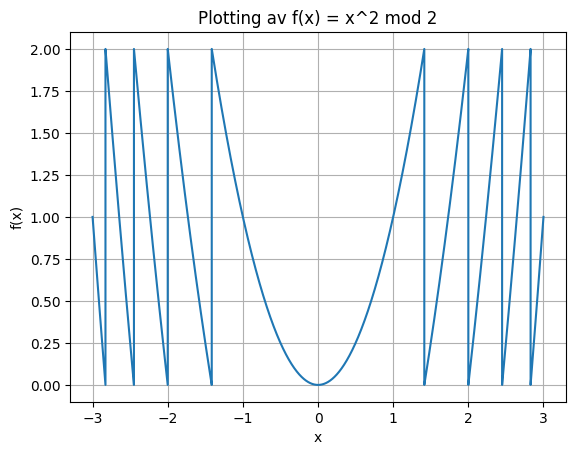

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 % 2

xs = np.linspace(-3, 3, 100000) # Verdiene x skal ha
ys = f(xs) # Det vi ønsker å plott av verdier for gitte x, altså verdien av y-aksen.

plt.plot(xs, ys) # Denne plott det bare ut. Alle verdier bare beregnes.
# Resten er bare å slenge på beskrivelser, før en til slutt faktisk viser frem hele greia:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plotting av f(x) = x^2 mod 2')
plt.grid(True)
plt.show()


Som vi kan se virker det rimelig at det er i området -1.41 til 1.41 at denne funksjonen er kontinuerlig.
Hva med tangensfunksjonen? 

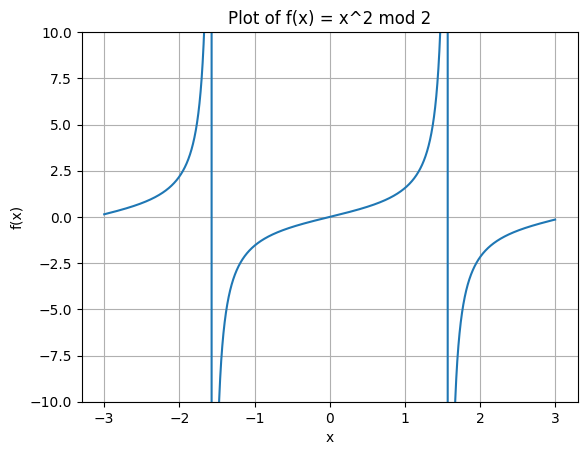

In [8]:
import numpy as np
import matplotlib.pyplot as plt

f = np.tan
xs = np.linspace(-3, 3, 1_000_000)

plt.plot(xs, f(xs))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2 mod 2')
plt.ylim(-10, 10)
plt.grid(True)
plt.show()


Her ser en at dersom en sampler for sjelden, eller som du ser her at du nærmer deg asymptoter, da kan tallene dine avvike en del.

## Oppsummering

Forsøket med tangens-funksjonen illustrerer at 
- eksempelfunksjonen longest_likely_continuous ikke gir særlig pålitelige resultater
- siden tangens stiger bratt nær asymptotene kan vi lett komme til å angi et for lite intervall
- reduksjon av toleransen, fører lett til retur av () - tomt tuppel - fordi den plutselig finner ingenting
    - hvis toleransen blir for liten i forhold til inkrementet av x-verdier i linspace
- vi kan i tillegg operere med mye tettere tall i linspace-arrayet vårt, men da begynner funksjonen å bruke lang tid
    - dvs., hvis du i fremtiden virkelig skal lage en funksjon for å sjekke kontinuitet: lag noe bedre enn denne
    - poenget her mest å vise en løsningsmetode
        - som også kan brukes for mange andre problemer
- typisk at vi må ivareta to (grupper av) variable
    - en for å huske intervallet (eller hva) vi undersøker akkurat nå
        - og som må resettes hver gang vi finner en slutt
    - en for å huske beste hittil
        - som må oppdateres hver gang vi finner noe bedre